#### GoFast - статистический анализ.

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
Сервисом можно пользоваться:

без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

Пользователи — users_go.csv


- user_id - уникальный идентификатор пользователя
- name - имя пользователя
- age - возраст
- city - город
- subscription_type - тип подписки (free, ultra)

Поездки — rides_go.csv

- user_id - уникальный идентификатор пользователя
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до - момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки

Подписки — subscriptions_go.csv

- subscription_type - тип подписки
- minute_price - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа

#### Шаг 1. Загрузка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

#####  Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:
 - /datasets/users_go.csv
 - /datasets/rides_go.csv
 - /datasets/subscriptions_go.csv

In [3]:
users = pd.read_csv('/datasets/users_go.csv', sep=',')
rides = pd.read_csv('/datasets/rides_go.csv', sep=',')
subs = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')

##### Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [4]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
rides.info()
rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
subs.info()
subs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


- Данные впринципе в нормальном состоянии, есть небольшие обработки. У нас есть 2 категории пользователей ( с платной подпиской и бесплатной подспиской).

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Хорошо! Можно также добавить информацию о размерах датафреймов, какие типы данных в них содержатся, набросать план по предобработке.</div>

#### Шаг 2. Предобработка данных


##### Приведите столбец date к типу даты pandas.

In [7]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%dT%H:%M:%S')

##### Создайте новый столбец с номером месяца на основе столбца date.

In [8]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Timestamp('2021-01-01 00:00:00')

Timestamp('2021-12-30 00:00:00')

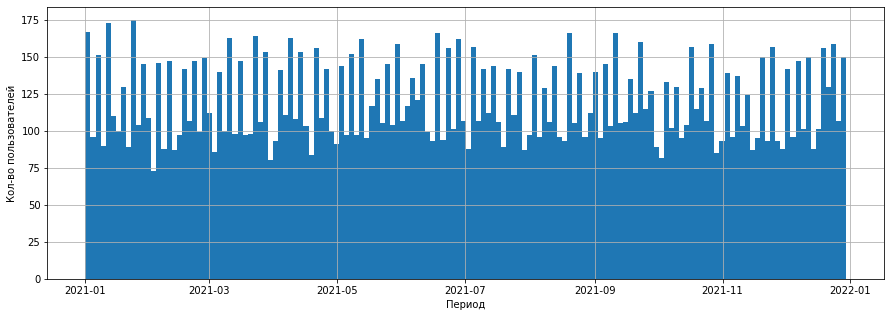

In [9]:
display(rides['date'].min(), rides['date'].max())
rides['date'].hist(bins = 150,figsize = (15,5))
plt.xlabel('Период')
plt.ylabel('Кол-во пользователей')
plt.show()

- Судя по графику, данные предоставлены за год с 1 Января 2021 по 1 Января 2022.

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Это хорошая проверка, теперь мы знаем, что помесячные данные не задублируются при агрегации данных по месяцам.

##### Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [10]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [11]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [12]:
subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

- Пропущенных значений нет,это уже хорошо.

- Проверим на дубликаты.

In [13]:
users.duplicated().sum()

31

In [14]:
rides.duplicated().sum()

0

In [15]:
subs.duplicated().sum()

0

- Имеются дуюликаты в users, удаляем.

In [16]:
users = users.drop_duplicates()
users.duplicated().sum()

0

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Молодец, отлично справился с предобработкой данных!

#### Шаг 3. Исследовательский анализ данных
Опишите и визуализируйте общую информацию о пользователях и поездках:
- 3.1 частота встречаемости городов;
- 3.2 соотношение пользователей с подпиской и без подписки;
- 3.3 возраст пользователей;
- 3.4 расстояние, которое пользователь преодолел за одну поездку;
- 3.5 продолжительность поездок.


##### частота встречаемости городов;

In [17]:
user_city = users.pivot_table(index='city', values='user_id', aggfunc='count')
user_city.sort_values(by= 'user_id',ascending = False)

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


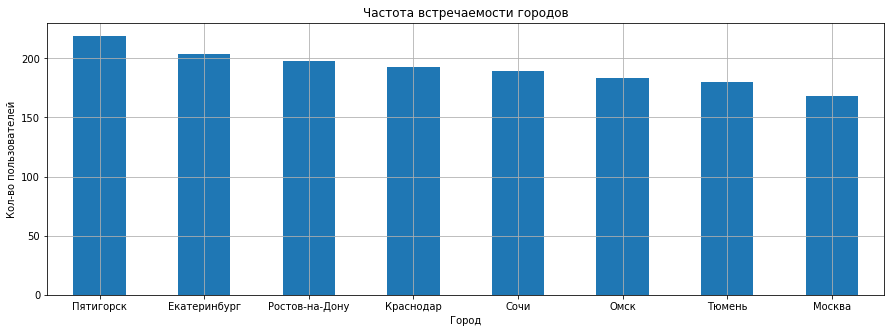

In [37]:
user_city = user_city.sort_values(by = 'user_id',ascending = False)
user_city.plot(title = 'Частота встречаемости городов',
               kind = 'bar',
               grid = True, 
               figsize = (15,5), 
               style = 'o-',
               rot = 0,
               legend = None)

plt.xlabel('Город')
plt.ylabel('Кол-во пользователей')
plt.show()

- В Пятигорске самое большое количество поездок по сравнениею с остальными городами.

##### соотношение пользователей с подпиской и без подписки;

In [19]:
user_sub = users.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
user_sub['percent'] = user_sub['user_id'] / user_sub['user_id'].sum() * 100
user_sub = user_sub.reset_index()
user_sub

,subscription_type,user_id,percent
0,free,835,54.432855
1,ultra,699,45.567145


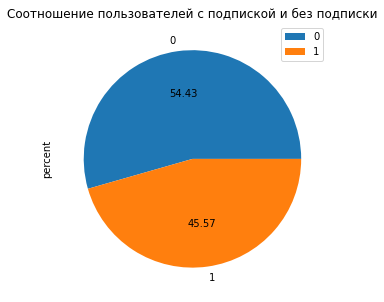

In [20]:
user_sub.plot(y = 'percent',
              title = 'Соотношение пользователей с подпиской и без подписки',
              figsize = (15,5), 
              kind = 'pie',
              autopct = '%.2f')
plt.show()

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Теперь график оформлен правильно!

- Пользователей с бесплатной подпиской больше чем с платной.

##### возраст пользователей;

In [21]:
user_age = users.pivot_table(index='age', values='user_id', aggfunc='count')
user_age

,user_id
age,
12,4
13,8
14,9
15,13
16,19
17,26
18,46
19,47
20,71


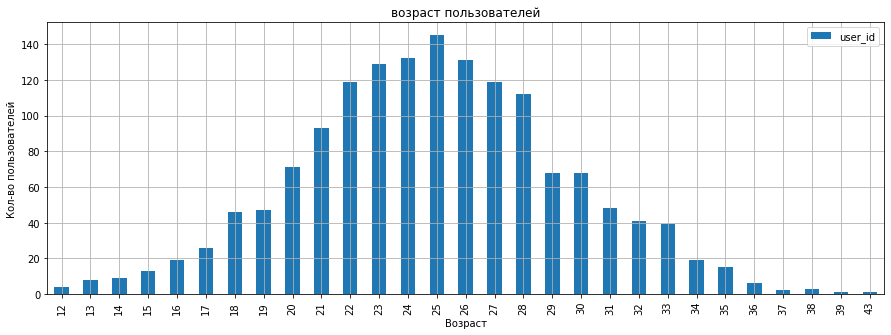

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [22]:
user_age.plot(title = 'возраст пользователей',
              kind = 'bar',
              grid = True, 
              figsize = (15,5))
plt.xlabel('Возраст')
plt.ylabel('Кол-во пользователей')
plt.show()
users['age'].describe()

- Основная категория клиентов в возрасте от 20 до 30 лет.

##### расстояние, которое пользователь преодолел за одну поездку;

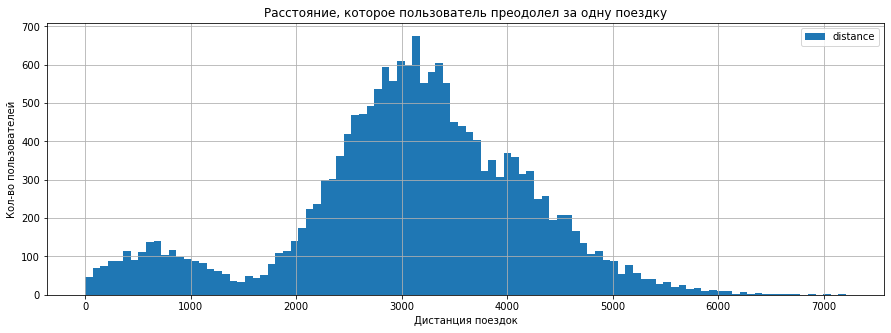

In [23]:
rides.plot(y = 'distance',
               kind = 'hist',
               title = 'Расстояние, которое пользователь преодолел за одну поездку',
               grid = True,
               bins = 100,
               figsize = (15,5),
               )
plt.xlabel('Дистанция поездок')
plt.ylabel('Кол-во пользователей')
plt.show()

- Дистанция одной поездки от 2200 до 4200 метров.

##### продолжительность поездок.

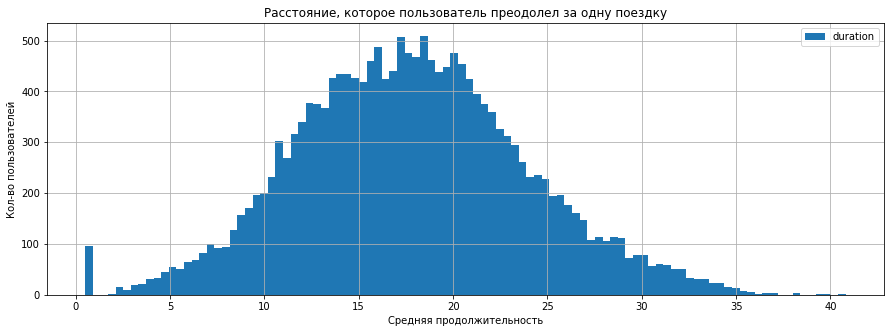

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [24]:
rides.plot(y = 'duration',
              kind = 'hist',
              title = 'Расстояние, которое пользователь преодолел за одну поездку',
              grid = True,
              bins = 100,
              figsize = (15,5),
               )
plt.xlabel('Средняя продолжительность')
plt.ylabel('Кол-во пользователей')
plt.show()
rides['duration'].describe()

- Продолжительность поездки от 10-25 минуты.

#### Шаг 4. Объединение данных
- 4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
- 4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
    - c данными о пользователях без подписки;
    - с данными о пользователях с подпиской.
- 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

##### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [25]:
u_d_s =pd.merge(users, rides, on='user_id')
u_d_s = pd.merge(u_d_s, subs, on='subscription_type')
u_d_s

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [26]:
u_d_s.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

##### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [27]:
sub_free = u_d_s.query('subscription_type == "free"')
sub_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [28]:
sub_ultra = u_d_s.query('subscription_type == "ultra" ')
sub_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Данные объединены верно и отдельные датафреймы созданы правильно. 👍</div>

##### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

- А дистанция у платных подписок 

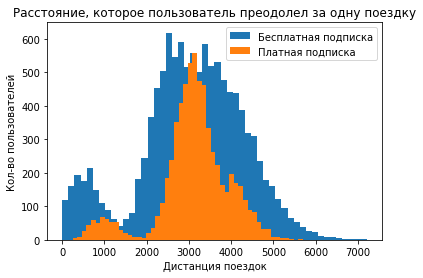

In [29]:
plt.hist(sub_free['distance'], label = 'Бесплатная подписка', bins = 50)
plt.hist(sub_ultra['distance'],label = 'Платная подписка', bins = 50)
plt.xlabel('Дистанция поездок')
plt.ylabel('Кол-во пользователей')
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.legend()
plt.show()

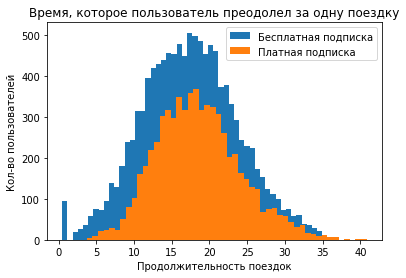

In [30]:
plt.hist(sub_free['duration'], label = 'Бесплатная подписка', bins = 50)
plt.hist(sub_ultra['duration'],label = 'Платная подписка', bins = 50)
plt.xlabel('Продолжительность поездок')
plt.ylabel('Кол-во пользователей')
plt.title('Время, которое пользователь преодолел за одну поездку')
plt.legend()
plt.show()

- Сонгласно приведенным графикам, дистанция у пользователей с бесплатной подпиской от 2000 до 4500, так как у пользователей с платной подпиской от 2500 до 3600.
- Так же согласно данным продолжительность поездки в среднем у пользователей с бесплатной подпиской от 10 до 25 минут, так как у пользователей с платной подпиской в среднем от 11 до 24 минут.

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Со сравнением согласен. В целом, можно отметить, что профили пользователей обеих категорий похожи.

#### Шаг 5. Подсчёт выручки
- 5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- 5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3,25.5 и 26.0 должны быть преобразованы к 26.

##### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [31]:
u_d_s['duration'] = np.ceil(u_d_s['duration'])
user_by_month = u_d_s.groupby(['user_id', 'month']).agg(
    total_distance=('distance', 'sum'),
    total_trips=('distance', 'count'),
    total_duration=('duration', 'sum'),
).reset_index()
user_by_month = pd.merge(user_by_month, users[['user_id', 'subscription_type']], on='user_id')

user_by_month

,user_id,month,total_distance,total_trips,total_duration,subscription_type
0,1,1,7027.511294,2,42.0,ultra
1,1,4,754.159807,1,7.0,ultra
2,1,8,6723.470560,2,46.0,ultra
3,1,10,5809.911100,2,32.0,ultra
4,1,11,7003.499363,3,56.0,ultra
...,...,...,...,...,...,...
11326,1534,6,3409.468534,2,26.0,free
11327,1534,8,7622.453034,2,48.0,free
11328,1534,9,4928.173852,1,23.0,free
11329,1534,11,13350.015305,4,78.0,free


##### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3,25.5 и 26.0 должны быть преобразованы к 26.

In [32]:
def calculate_trip_cost(row):
    if row['subscription_type'] == 'free':
        return (subs['start_ride_price'][0] * row['total_trips']) + (subs['minute_price'][0] * row['total_duration'])
    else:
        return (subs['minute_price'][1] * row['total_duration']) + subs['subscription_fee'][1]
    
user_by_month['trip_cost'] = user_by_month.apply(calculate_trip_cost, axis=1)

user_by_month

,user_id,month,total_distance,total_trips,total_duration,subscription_type,trip_cost
0,1,1,7027.511294,2,42.0,ultra,451.0
1,1,4,754.159807,1,7.0,ultra,241.0
2,1,8,6723.470560,2,46.0,ultra,475.0
3,1,10,5809.911100,2,32.0,ultra,391.0
4,1,11,7003.499363,3,56.0,ultra,535.0
...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,2,26.0,free,308.0
11327,1534,8,7622.453034,2,48.0,free,484.0
11328,1534,9,4928.173852,1,23.0,free,234.0
11329,1534,11,13350.015305,4,78.0,free,824.0


In [33]:
user_by_month.groupby('subscription_type')['trip_cost'].mean()

subscription_type
free     328.641365
ultra    362.792191
Name: trip_cost, dtype: float64

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Теперь выручка рассчитана верно!

#### Шаг 6. Проверка гипотез
- Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

##### Гипотеза 

- Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.


- Н0: Пользователи с подпиской тратят меньше или столько же,сколько пользователи без подписки.
- Н1: Пользователи с подпиской тратят больше пользователей без подписки..

In [34]:
alpha = 0.05

subs_dur = u_d_s[u_d_s['subscription_type'] == 'ultra']['duration']

non_subs_dur = u_d_s[u_d_s['subscription_type'] == 'free']['duration']

results = st.ttest_ind(subs_dur, non_subs_dur, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Пользователи с подпиской тратят меньше или столько же')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Пользователи с подпиской тратят больше')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу: Пользователи с подпиской тратят меньше или столько же


- Исходя из проведенного теста на сравнение средних значений продолжительности поездок между пользователями с подпиской и пользователями без подписки, было выявлено, что существует статистически значимое различие в продолжительности поездок между этими двуми группами. Пользователи с подпиской демонстрируют другой уровень продолжительности поездок по сравнению с пользователями без подписки.

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Гипотеза сформулирована и проверена правильно.

##### Гипотеза

- Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

- H0: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
- H1: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [35]:
subs_dist = u_d_s[u_d_s['subscription_type'] == 'ultra']['distance']

interested_value = 3130

results =  st.ttest_1samp(subs_dist, 3130, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.')


p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.


- Согласно проведенному анализу, нет возможности доказать что клиенты с платной подпиской проезжают больше 3130 метров.

##### Гипотеза

- Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

- H0: Средняя помесячная выручка от пользователей с подпиской по месяцам не отличается от средней выручки от пользователей без подписки.
- H1: Средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя выручка от пользователей без подписки.

In [36]:
subs_rev = user_by_month[user_by_month['subscription_type'] == 'ultra']['trip_cost']
non_subs_rev = user_by_month[user_by_month['subscription_type'] == 'free']['trip_cost']

results = st.ttest_ind(subs_rev, non_subs_rev, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя выручка от пользователей без подписки.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Средняя помесячная выручка от пользователей с подпиской по месяцам не отличается от средней выручки от пользователей без подписки.')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу: Средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем средняя выручка от пользователей без подписки.


- Согласно проведенному анализу, есть разница между выручкой с подпиской и без подписки. Клиенты имеющие подписку приносят больше помесячной выручки чем без подписки.

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Верно, есть основания утверждать, что подписчики в среднем приносят больше выручки в месяц.

- Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Я думаю что при проверке данной гипотезы мы можем использовать парный t-тест(st.ttest_rel)),двусторонняя гипотеза, так как у нас есть данные до обновления и после.

#### Итоговый вывод по проведенному анализу данных:

- Согласно полученным данным, в среднем пользователи в возрасте от 22 до 28 лет.
- Так же средняя дистанция поездки составляет 2200 - 4200 метров, а продолжительность поезки 10-25 минут.
- Согласно статистичекому анализу, пользователи имеющую платную подписку показывают различие по продолжительности поездки по сравнению с пользователями с бесплатной подпиской. 
- Согласно статистическому анализу, расстояние поездок пользователей с подпиской за одну поездку, не показывает превышение оптимальных значений.
- Согласно статистическому анализу, помесячная выручка с подпиской превышает помесячной выручки без подписки, в связи с этим, необходимо увеличить число подписок. Возможно, предложить бесплатные минуты поездкок, при первичной платной подписки. Так же можно предложить 'кэш-бэк' минут после 3 месячной подписки.
- Согласно подсчету выручки, то клиенты с платной подпиской более выгоднее компании, так как они больше приносят выручки в среднем помесячно 363 р., а у пользователи с бесплатной подпиской в среднем 329 р.

#### Шаг 7. Распределения

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

<h5><b>🏁 Общий комментарий ревьюера</b></h5>

Ты хорошо поработал над проектом. Но нужно кое-что поправить, чтобы я его принял.

Критические замечания я добавил в меню **Contents** слева.

Также, постарайся отработать желтые комментарии.

Буду ждать твой доработанный проект. ⌛️

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

<h5><b>🏁 Общий комментарий ревьюера V2:</b></h5>

Спасибо, что доработал проект! Критических замечаний больше нет, получилась очень хорошая работа.

Успехов в дальнейшем обучении! 🏆

</div>